## CS 889 Assignment 05
### Yuwei Jiao 20645480

### Objective 1 & 2
### description:
- problem:
    1. The suggested function *isContourConvex* does not work well on distorted squares.
    2. The value of approximation accuracy is important. If it's too large, round dots can be recognized as square too. If it's too small, distorted squares might be ignored.
- resources: 
    1. Use this [link][1] to understand how hierarchy defined.
    2. This [webpage][2] helps detect contour structure and shape.
[1]: (http://docs.opencv.org/trunk/d9/d8b/tutorial_py_contours_hierarchy.html)
[2]: (http://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html)

In [1]:
%matplotlib inline
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from helpers import imshow

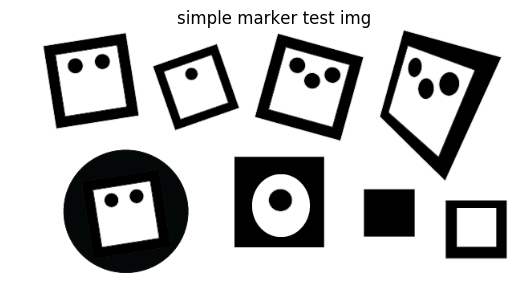

In [2]:
# the original image
img = cv2.imread('simple_marker_test.png')
imshow(img, 'simple marker test img')

In [3]:
# test if the contour is a (distorted) square
# r: approximation accuracy
def testPoly(cnt, r):
    epsilon = r * cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    return len(approx) == 4

In [4]:
# recognize marker in image
# thre: background substraction threshold; r: approximation accuracy; lineSize, fontSize: display parameters
def trackMarker(img, thre, r, lineSize, fontSize):
    # create a mask
    mask = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(mask, thre, 255, cv2.THRESH_BINARY)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, None, iterations = 1)
    # find all contours
    mask, contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # for each contours test if it is a possible square
    polyArray = [testPoly(cnt, r) for cnt in contours]
    for first in range(0, len(contours)):
        cnt = contours[first]
        # the top level of marker should be large enough and quadrilateral
        if cv2.contourArea(cnt) > 100 and polyArray[first]:
            second = hierarchy[0][first][2]
            # the second level should be quadrilateral without next contour in the same level
            # and has at least one child contour
            if polyArray[second] and hierarchy[0][second][0] == -1 and hierarchy[0][second][2] > 0:
                cv2.drawContours(img, [cnt], -1, (0, 0, 255), lineSize)
                # count the sum of child blobs in the marker
                third = hierarchy[0][second][2]
                blobs = 0
                while third > 0:
                    blobs += 1
                    third = hierarchy[0][third][0]
                # get the position of the marker on the image
                M = cv2.moments(cnt)
                position = (int(M['m10'] / M['m00']), int(M['m01'] / M['m00']))
                cv2.putText(img, str(blobs), position, cv2.FONT_HERSHEY_SIMPLEX, fontSize, (0, 0, 255), 2)
    # return mask and image
    return [mask, img]

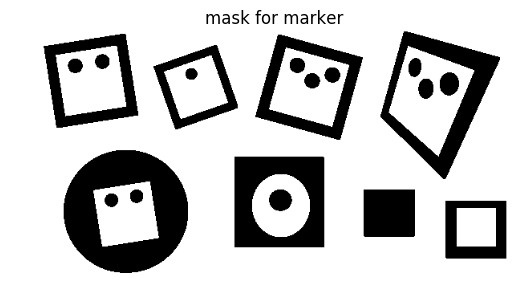

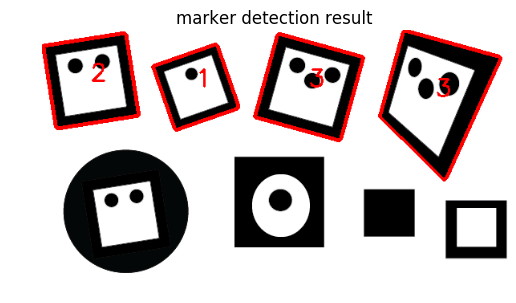

In [5]:
img = cv2.imread('simple_marker_test.png')
mask, img = trackMarker(img, 100, 0.02, 3, 1)
imshow(mask, 'mask for marker')
imshow(img, 'marker detection result')

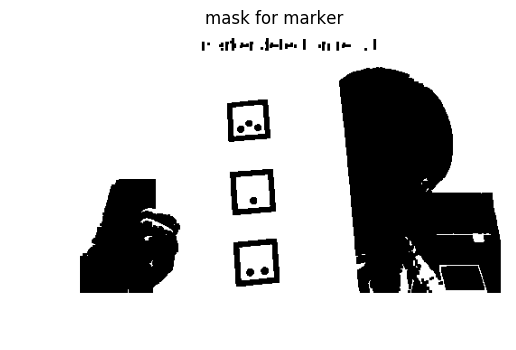

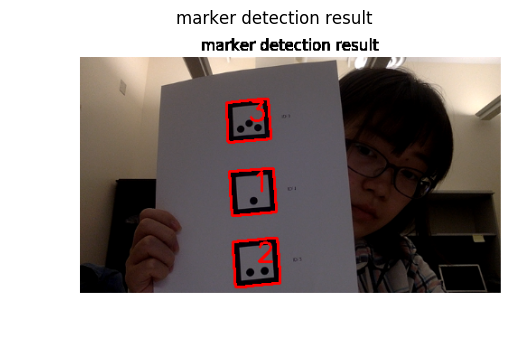

In [6]:
img = cv2.imread('test.png')
mask, img = trackMarker(img, 50, 0.02, 2, 1)
imshow(mask, 'mask for marker')
imshow(img, 'marker detection result')

In [7]:
def realtimeTracker(r):
    camera = cv2.VideoCapture(0)
    w = 640
    camera.set(cv2.CAP_PROP_FRAME_WIDTH, w)
    camera.set(cv2.CAP_PROP_FRAME_HEIGHT, w * 3 / 4)
    while True:
        ret, frame = camera.read()
        frame = cv2.flip(frame, 1)
        mask, img = trackMarker(frame, 50, r, 2, 1)
        cv2.imshow('markerTracker', img)
        key = cv2.waitKey(5)
        if key ==  27:
            break
        elif key == 13:
            imshow(mask, 'mask for marker')
            imshow(img, 'marker tracker result')
    cv2.destroyAllWindows()
    camera.release()

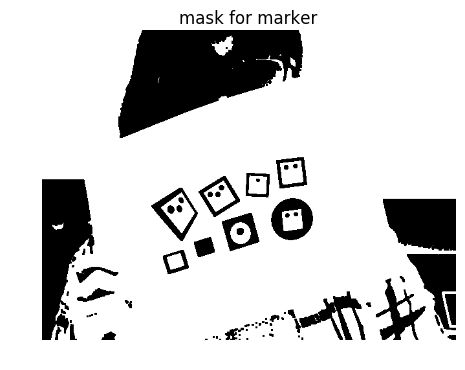

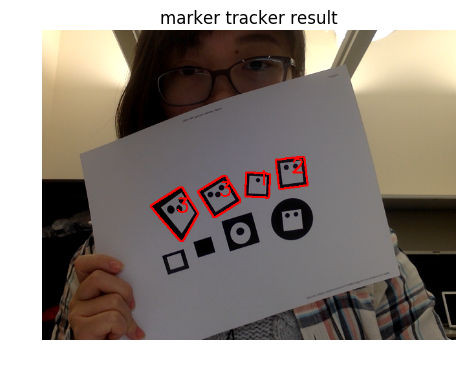

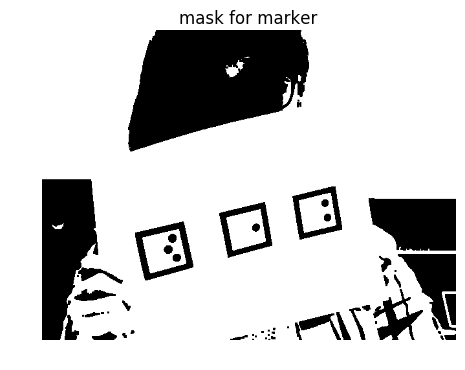

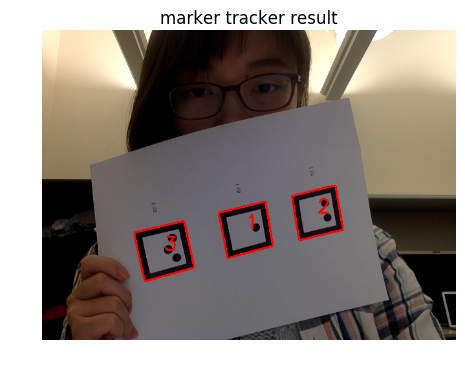

In [ ]:
realtimeTracker(0.02)

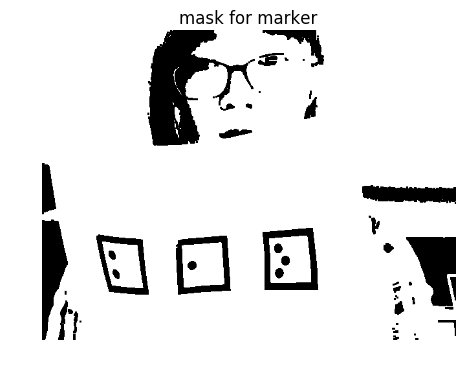

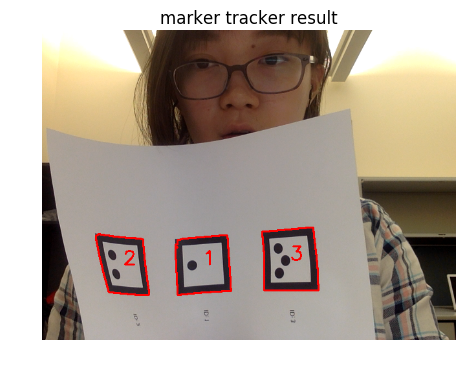

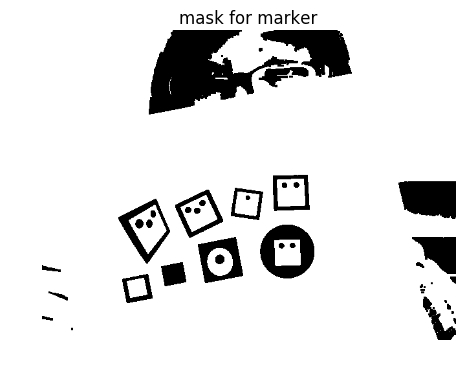

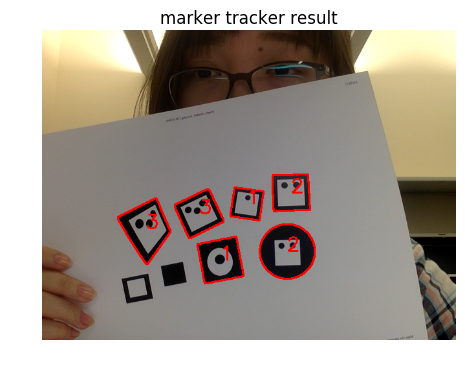

In [8]:
realtimeTracker(0.1)